In [1]:
import pyforest

In [2]:
milk = pd.read_csv('monthly_milk_production.csv')

<IPython.core.display.Javascript object>

In [3]:
milk.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
# CONVERTED COLUMN DATE INTO DATE TIME FORMAT  AND STORED IN A NEW VARIABLE

milk.Date = pd.to_datetime(milk.Date, infer_datetime_format = True)

<IPython.core.display.Javascript object>

In [6]:
# SET DATE AS INDEX AND STORED IN A NEW VARIABLE 

milk_ind = milk.set_index(['Date'])
milk_ind

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

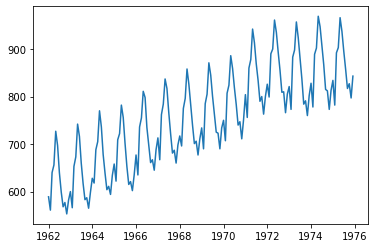

In [10]:
# FROM THIS VIZUALIZATION WE CAN UNDERSTAND THAT WE DATA IS NOT STATIONARY AND WE HAVE TO MAKE IT STATIONARY.

plt.plot(milk_ind)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

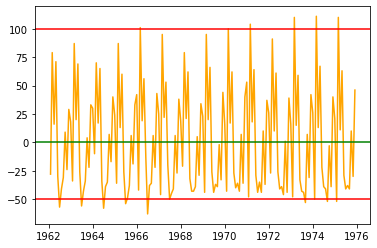

In [14]:
# DIFFERENCING ONCE AND VIZUALIZING BY THIS WE GET DIFFERENCE VALUE AS 1 AS WE HAVE DIFFERENED IT ONLY ONCE.

plt.plot(milk_ind.diff(),color = 'orange')
plt.axhline(y = 100, color = 'red')
plt.axhline(y = -50, color = 'red')
plt.axhline(y = 0, color = 'green')

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

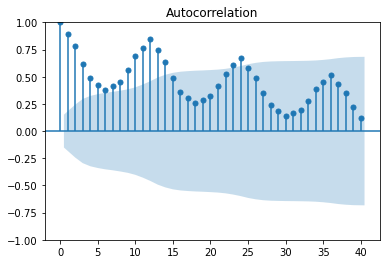

In [17]:
plot_acf(milk_ind.Production, lags = 40);

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


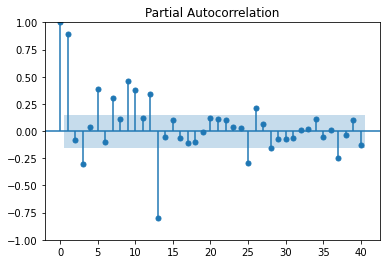

In [20]:
plot_pacf(milk_ind.Production, lags = 40);

Here we Observe that PACF(P) = 2, ACF(q) = 0, AND DIFFERENCE(D) = 1 \
(P,D,Q) = (2,1,0)

In [57]:
# NOW INORDER TO TEST OUR MODEL BEFORE FORECASTING ON VALUES WHERE WE DONT HAVE ACTUAL FIGURES WE WILL TRY TO FORECAST ON SOME DATA WHERE WE HAVE ACTUAL RESULTS.
train = milk_ind.iloc[:148]
test = milk_ind.iloc[148:]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

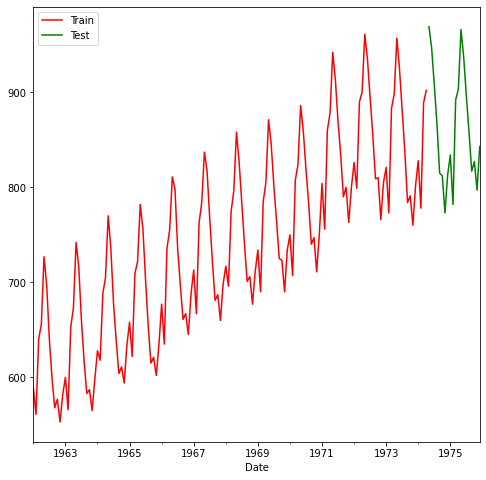

In [58]:
plt.figure(figsize = (8,8))
train['Production'].plot(legend = 'True',label = 'Train', color = 'red')
test['Production'].plot(legend = "True", label = 'Test', color = 'g')

In [59]:
# # BUILD MODEL
# model = ARIMA(milk_ind, order = (2,1,0))
# result = model.fit()

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

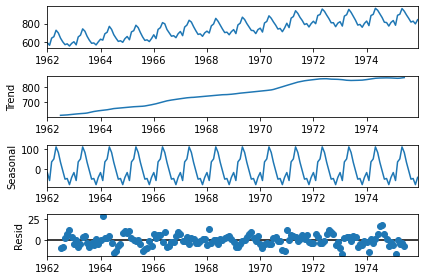

In [61]:
result = seasonal_decompose(milk_ind)
result.plot();

In [62]:
# WE USE AUTO ARIMA SO THAT IT CAN GIVE US THE BEST COMBINATION OF P,Q,D,S WHERE S STANDS FOR SEASONAL
auto_arima(milk_ind, seasonal = True, m = 12, suppress_warnings=False)

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12))

In [63]:
model_sarima = SARIMAX(milk_ind, order=(2,0,0), seasonal_order = (0, 1, 1, 12))
result = model_sarima.fit()

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [64]:
pred = result.predict(start = 148, end = 167)

In [65]:
pred

1974-05-01    963.134903
1974-06-01    938.168556
1974-07-01    901.935572
1974-08-01    866.389182
1974-09-01    819.706849
1974-10-01    821.165168
1974-11-01    778.580767
1974-12-01    813.644385
1975-01-01    838.109283
1975-02-01    790.347178
1975-03-01    888.306565
1975-04-01    904.958905
1975-05-01    966.831119
1975-06-01    939.484006
1975-07-01    895.907282
1975-08-01    855.164701
1975-09-01    808.298629
1975-10-01    817.173928
1975-11-01    788.422469
1975-12-01    835.204921
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

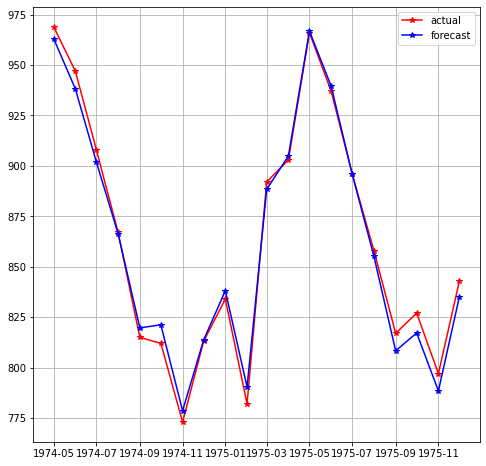

In [66]:
plt.figure(figsize = (8,8))
plt.plot(milk_ind.iloc[148:168], marker = "*", color = 'r', label = 'actual')
plt.plot(pred,color = 'blue', label = 'forecast', marker = "*")
plt.legend()
plt.grid()

In [70]:
error = milk_ind.Production[148:168] - pred
error

Date
1974-05-01    5.865097
1974-06-01    8.831444
1974-07-01    6.064428
1974-08-01    0.610818
1974-09-01   -4.706849
1974-10-01   -9.165168
1974-11-01   -5.580767
1974-12-01   -0.644385
1975-01-01   -4.109283
1975-02-01   -8.347178
1975-03-01    3.693435
1975-04-01   -1.958905
1975-05-01   -0.831119
1975-06-01   -2.484006
1975-07-01    0.092718
1975-08-01    2.835299
1975-09-01    8.701371
1975-10-01    9.826072
1975-11-01    8.577531
1975-12-01    7.795079
dtype: float64

In [71]:
MSE = np.mean(np.square(error))
MSE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

35.64054182666268

In [69]:
RMSE = np.sqrt(MSE)
RMSE

<IPython.core.display.Javascript object>

5.933309988246178

# Alcohol Production

In [35]:
alco = pd.read_csv('Alcohol_Sales.csv')

<IPython.core.display.Javascript object>

In [36]:
alco.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [37]:
alco.DATE = pd.to_datetime(alco.DATE, infer_datetime_format = True)

<IPython.core.display.Javascript object>

In [38]:
alco_ind = alco.set_index(['DATE'])
alco_ind

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [66]:
alco_ind.shape

(325, 1)

In [39]:
alco_ind.rename(columns={'S4248SM144NCEN':'Sales'}, inplace= True)

In [40]:
alco_ind

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<IPython.core.display.Javascript object>

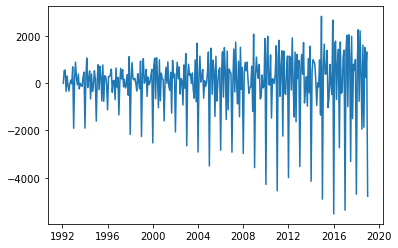

In [41]:
plt.plot(alco_ind.Sales.diff())

In [42]:
alco_log = np.log(alco_ind)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

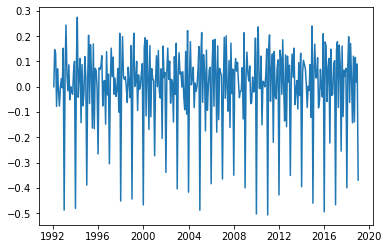

In [43]:
plt.plot(alco_log.diff())

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

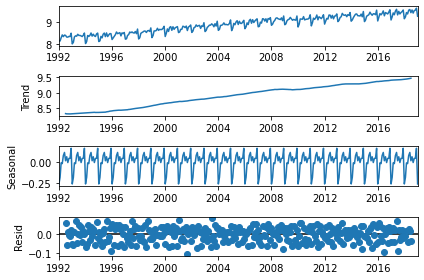

In [50]:
result1 = seasonal_decompose(alco_log)
result1.plot();

In [58]:
alco_log.shape

(325, 1)

In [51]:
auto_arima(alco_log, seasonal=True, suppress_warnings=False, m = 12)

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 0, 2, 12))

In [52]:
model1_sarimax = SARIMAX(alco_log, order=(3,1,1), seasonal_order=(2, 0, 2, 12))
result2 = model1_sarimax.fit()

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
pred2 = np.exp(result2.predict(start = 296, end = 324))
pred2

<IPython.core.display.Javascript object>

2016-09-01    11928.344505
2016-10-01    11781.444076
2016-11-01    12630.452796
2016-12-01    14249.008820
2017-01-01     9119.317026
2017-02-01    10639.926354
2017-03-01    11998.062991
2017-04-01    11786.069323
2017-05-01    13513.641770
2017-06-01    13948.802677
2017-07-01    11997.809792
2017-08-01    13626.538863
2017-09-01    12720.698305
2017-10-01    12525.430724
2017-11-01    13123.128292
2017-12-01    14372.076084
2018-01-01     9670.533933
2018-02-01    10739.944974
2018-03-01    12225.413059
2018-04-01    12228.598469
2018-05-01    13610.962995
2018-06-01    14318.760766
2018-07-01    12474.786811
2018-08-01    13865.226832
2018-09-01    12782.607984
2018-10-01    13549.779852
2018-11-01    13734.389985
2018-12-01    15023.117429
2019-01-01    10364.099172
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

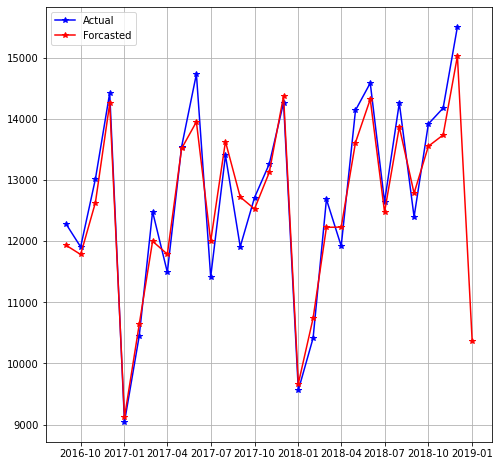

In [86]:
plt.figure(figsize=(8,8))
plt.plot(alco_ind.iloc[296:324], marker="*",color="b",label='Actual')
plt.plot(pred2 , marker="*",color="r",label='Forcasted')
plt.legend()
plt.grid()
plt.show()

In [87]:
pred3 = np.exp(result2.predict(start = 324, end = 335))
pred3

<IPython.core.display.Javascript object>

2019-01-01    10364.099172
2019-02-01    11360.444171
2019-03-01    13312.632344
2019-04-01    13524.897744
2019-05-01    14610.078815
2019-06-01    15430.882149
2019-07-01    13783.590188
2019-08-01    14516.739355
2019-09-01    13713.098120
2019-10-01    14520.930232
2019-11-01    14466.495441
2019-12-01    16517.828172
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

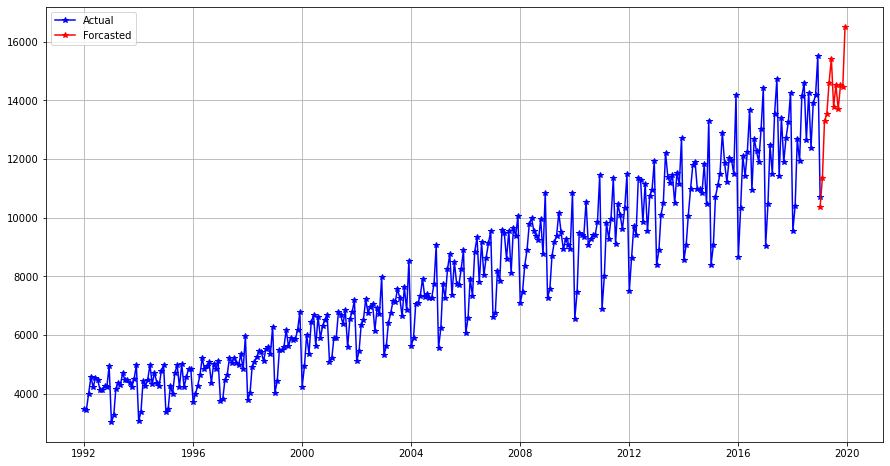

In [89]:
plt.figure(figsize=(15,8))
plt.plot(alco_ind, marker="*",color="b",label='Actual')
plt.plot(pred3 , marker="*",color="r",label='Forcasted')
plt.legend()
plt.grid()
plt.show()

In [81]:
error = alco_ind[296:326].Sales - pred2
error

DATE
2016-09-01    343.655495
2016-10-01    123.555924
2016-11-01    385.547204
2016-12-01    171.991180
2017-01-01    -76.317026
2017-02-01   -187.926354
2017-03-01    482.937009
2017-04-01   -295.069323
2017-05-01     31.358230
2017-06-01    781.197323
2017-07-01   -581.809792
2017-08-01   -224.538863
2017-09-01   -813.698305
2017-10-01    185.569276
2017-11-01    137.871708
2017-12-01   -107.076084
2018-01-01   -106.533933
2018-02-01   -324.944974
2018-03-01    457.586941
2018-04-01   -309.598469
2018-05-01    527.037005
2018-06-01    264.239234
2018-07-01    165.213189
2018-08-01    391.773168
2018-09-01   -386.607984
2018-10-01    364.220148
2018-11-01    439.610015
2018-12-01    480.882571
2019-01-01    353.900828
dtype: float64

In [83]:
MSE = np.mean(np.square(error))
MSE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

144228.81861320455